# Metody statystyczne zestaw 2
## Autor Paweł Jelonek

### Symulacja procesu Markova
 - $2$ użytkowników
 - $1$ komputer

#### Do komputera zalogowanych może być:
 - $x = 0$(użytkowników)
 - $x = 1$(użytkowników)
 - $x = 2$(użytkowników)

Prawdopodonbieństwo logowania $Plogowania = 0.2$<br>
Prawdopodonbieństwo pozostania niezalogowanym $1 - Plogowania = 0.8$<br>
Prawdopodonbieństwo wylogowania $Pwylogowania = 0.5$<br>
Prawdopodonbieństwo pozostania zalogowanym $1-Pwylogowania = 0.5$<br>



Macierz Przejść $= \left[\begin{array}{ccc}
0.64 & 0.32 & 0.04\\
0.4 & 0.5 & 0.1\\
0.25 & 0.5 & 0.25\\
\end{array}\right]$

In [53]:
from numpy import subtract, random, arange, matrix, subtract, abs
from numpy.linalg import matrix_power, det, solve
from matplotlib import pyplot as plt

### Problem A
### Policzyć $[P]^N$ dla dużych $N$

In [86]:
P = [[0.64, 0.32, 0.04],
            [0.40, 0.50, 0.10],
            [0.25, 0.50, 0.25]]

In [ ]:
T = matrix([[0.5, 0, 0.5],
            [0, 0.25, 0.75],
            [0.5, 0.5, 0]])

In [66]:
power = 100
print(matrix_power(P, power))

[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]


### Kryterium zbieżności $|P^N - P^{N-1}| < 10^{-5}$

In [98]:
def convergence_of_P(N, P):
    y= []
    for n in range(2, N):
        prev_P = matrix_power(P, n-1)
        current_p = matrix_power(P, n)
        y.append(abs(subtract(current_p, prev_P)[1,1]))
    return y

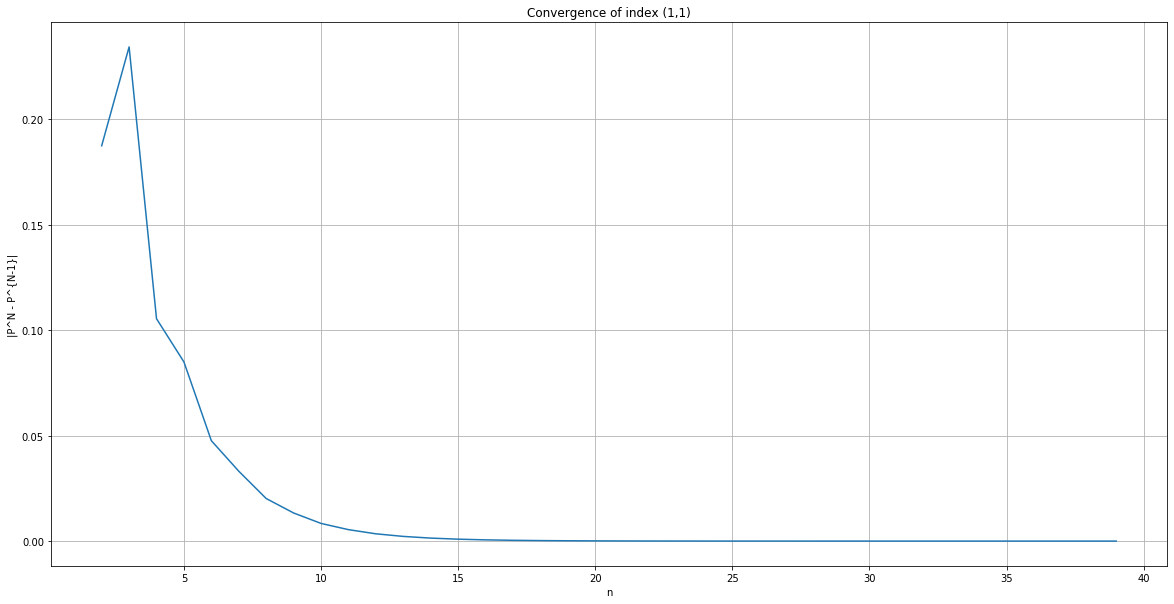

In [101]:
N = 40
y = convergence_of_P(N, T)
plt.grid()
plt.title("Convergence of index (1,1)")
plt.xlabel('n')
plt.ylabel('|P^N - P^{N-1}|')
plt.rcParams["figure.figsize"]=(20, 10)
_ = plt.plot(range(2, N), y)

### Można narysować wykres gdzie:
### $y = [P^n]ij$
### $x = n$

In [102]:
def markov_chain(N, T):
    y = []
    for n in range(1, N):
        tn = matrix_power(T, n)
        y.append(tn[1, 1])
    return y

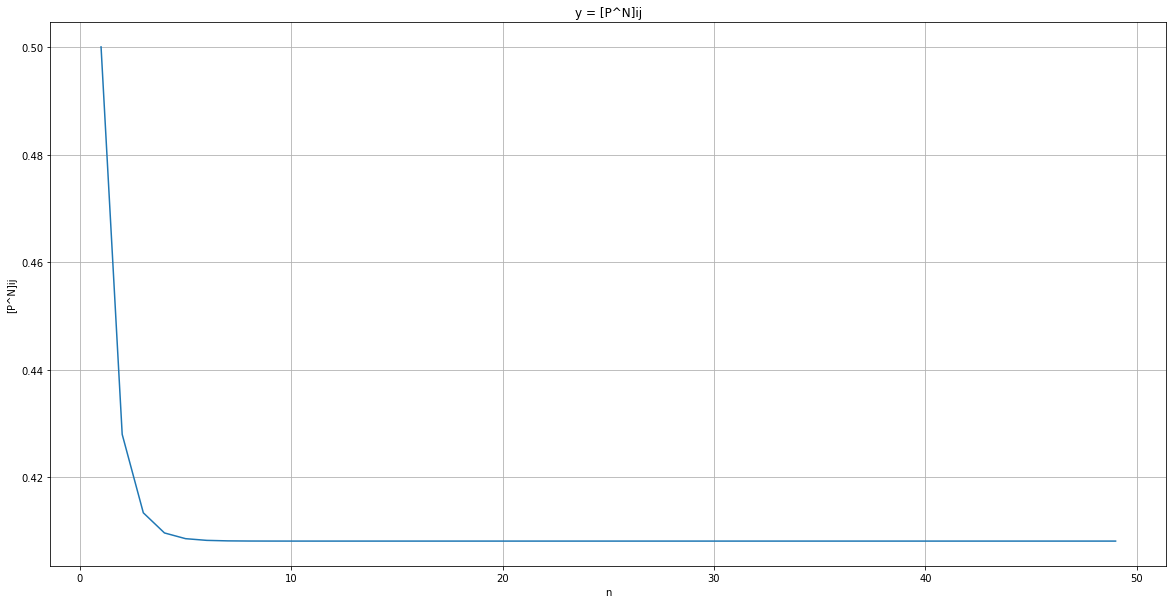

In [104]:
N = 50
y = markov_chain(N, P)

plt.grid()
plt.title("y = [P^N]ij")
plt.xlabel('n')
plt.ylabel('[P^N]ij')
plt.rcParams["figure.figsize"]=(20, 10)
_ = plt.plot(range(1, N), y)

### Problem B
### Start z wybranego węzła $x=0,1,2$ <br> Losowanie kolejnego węzła zgodnie z $P$<br>Przejście do nowego węzła

In [157]:
def find_new_node(random_number, current_index, P):
    prob_total = 0.0
    index = 0
    for prob in P[current_index]:
        prob_total += prob
        if random_number <= prob_total:
            return index
        index += 1

In [158]:
def simulate_markov_frequency(N, index, P):
    y1 = N * [0]
    y2 = N * [0]
    y3 = N * [0]
    current_index = index
    for n in range(N):
        new_index = find_new_node(random.uniform(0, 1), current_index, P)
        if new_index == 0:
            y1[n] += y1[n-1] + 1
            y2[n] += y2[n-1]
            y3[n] += y3[n-1]
        if new_index == 1:
            y2[n] += y2[n-1] + 1
            y1[n] += y1[n-1]
            y3[n] += y3[n-1]
        if new_index == 2:
            y3[n] += y3[n-1] + 1
            y1[n] += y1[n-1]
            y2[n] += y2[n-1]
        current_index = new_index
    return y1, y2, y3

### Losowanie dla $~N=10^4$
### Policzenie $\pi^{exp}_{i} = N^{i}/N, N^{i}$ - ile razy odwiedzone $x = (0,1,2)$

Starting node equals 0
Percentage of visiting node 0 equals 0.507
Percentage of visiting node 1 equals 0.4119
Percentage of visiting node 2 equals 0.0811
Starting node equals 1
Percentage of visiting node 0 equals 0.5141
Percentage of visiting node 1 equals 0.4063
Percentage of visiting node 2 equals 0.0796
Starting node equals 2
Percentage of visiting node 0 equals 0.5039
Percentage of visiting node 1 equals 0.4183
Percentage of visiting node 2 equals 0.0778


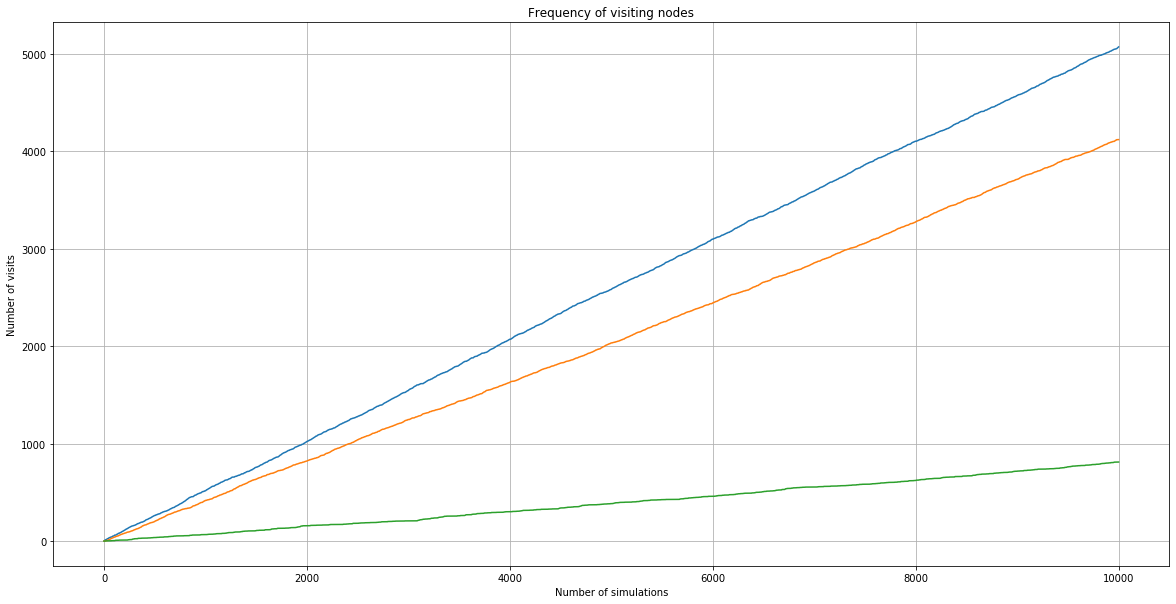

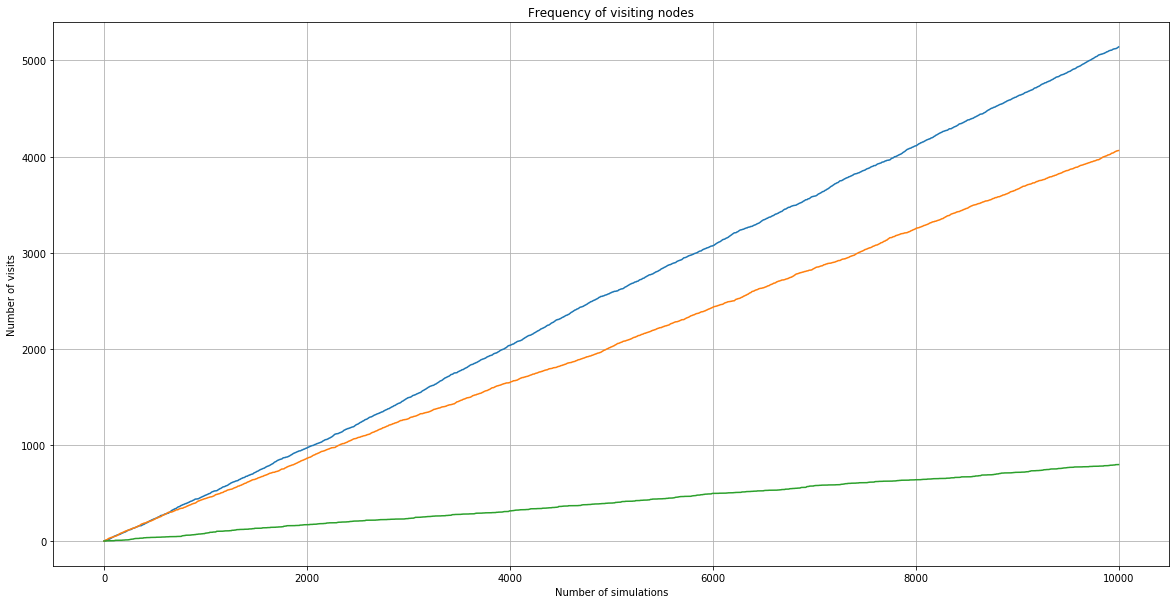

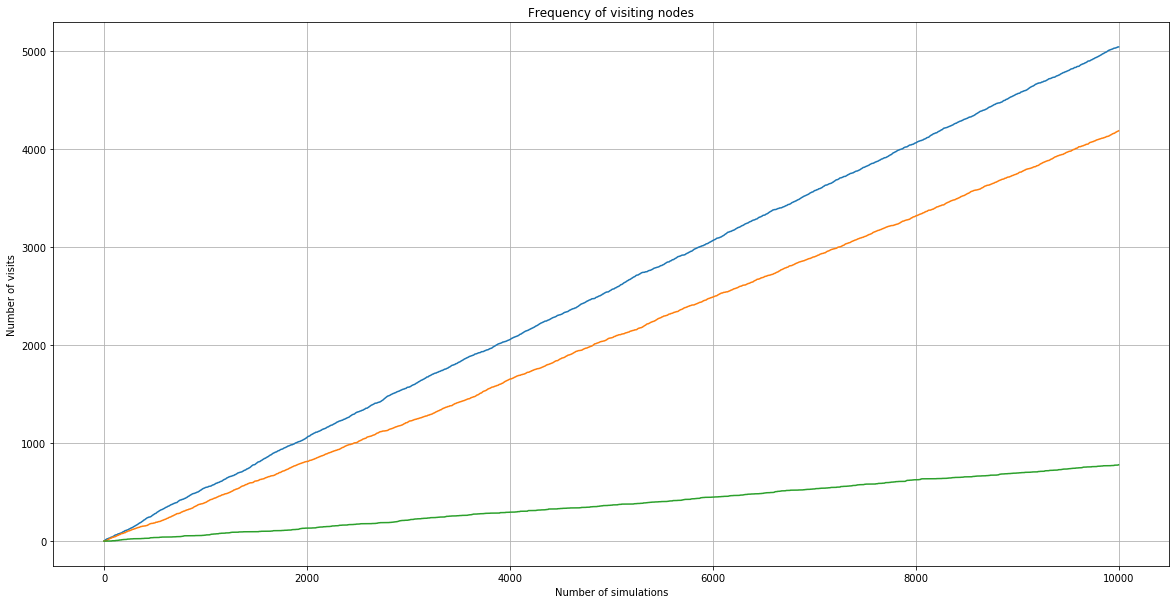

In [166]:
N = 10000
for x in (0,1,2):
    y1, y2, y3 = simulate_markov_frequency(N, x, P)
    print('Starting node equals', x)
    plt.grid()
    plt.title('Frequency of visiting nodes')
    plt.xlabel('Number of simulations')
    plt.ylabel('Number of visits')
    plt.rcParams["figure.figsize"]=(20, 10)
    plt.plot(range(N), y1)
    plt.plot(range(N), y2)
    _ = plt.plot(range(N), y3)
    print('Percentage of visiting node 0 equals', y1[len(y1)-1]/N)
    print('Percentage of visiting node 1 equals', y2[len(y2)-1]/N)
    print('Percentage of visiting node 2 equals', y3[len(y3)-1]/N)
    plt.show()

### Porównanie z $[P]^{N}$, start z $x=(0,1,2)$, zbieżność

### Problem C
- $100$ użytkowników
- $x = 0,1,2,...,100$ 
- $Plogowania = 0.2$, $Pwylogowania=0.5$
- Trudno jest skonstruować macierz prawdopodobieństwo
- Wykonujemy symulację trajektorii
- Ile wynosi $\Pi^{exp}_{i}$ dla $i=0,1,...100$?

In [172]:
def calculate_new_state(user_state, prob_login, prob_logout, random):
    if not user_state:
        if random < prob_login:
            return True
        else: 
            return False
    else:
        if random < prob_logout:
            return False
        else:
            return True

In [173]:
def simulate_markov_frequency2(users, prob_login, prob_logout, n_users):
    for user_state in range(0, n_users):
        new_state = calculate_new_state(user_state, prob_login, prob_logout, random.uniform(0, 1))
        users[user_state] = new_state
    state_node = 0
    for user_state in users:
        if user_state is True:
            state_node += 1
    return state_node

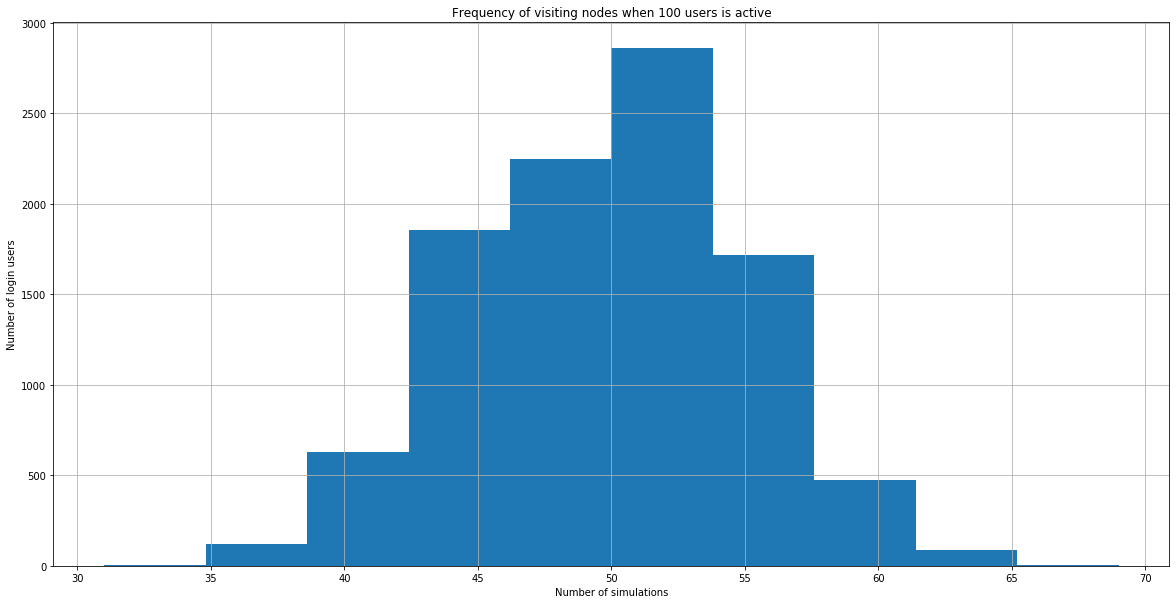

In [174]:
n_users = 100
users = [False] * n_users
prob_login = 0.2
prob_logout = 0.5
N = 10000
y = []
for n in range(N):
    y.append(simulate_markov_frequency2(users, prob_login, prob_logout, n_users))

plt.grid()
plt.title('Frequency of visiting nodes when 100 users is active')
plt.xlabel('Number of simulations')
plt.ylabel('Number of login users')
plt.rcParams["figure.figsize"]=(20, 10)
_=plt.hist(y)

- Wykresy zbieżności $\Pi^{exp}_{i}=N^{i}/N$

### Problem D
#### Podobna symulacja jak w punkcie C, inne <br> prawdopodobieństwa dla wylogowanych
$Plogowania = 0.2$
$Pnielogowania = 0.8$
$Pwylogowania = 1-(0.008x+0.1)$
$Ppozostaniazalogowanym = 0.008x+0.1

In [252]:
def calculate_new_state(user_state, prob_login, prob_logout, random):
    if not user_state:
        if random < prob_login:
            return True
        else: 
            return False
    else:
        if random < prob_logout:
            return False
        else:
            return True

In [253]:
def prob_logout(x):
    return 1 - (0.008*x + 0.1)

In [256]:
def simulate_markov_frequency2(users, prob_login, n_users, active_users):
    for user_state in range(0, n_users):
        old_state = user_state
        new_state = calculate_new_state(user_state, prob_login, prob_logout(active_users), random.uniform(0, 1))
        if old_state is True and new_state is False:
            active_users -= 1
        if old_state is False and new_state is True:
            active_users += 1
        users[user_state] = new_state
    state_node = 0
    for user_state in users:
        if user_state is True:
            state_node += 1
    return state_node

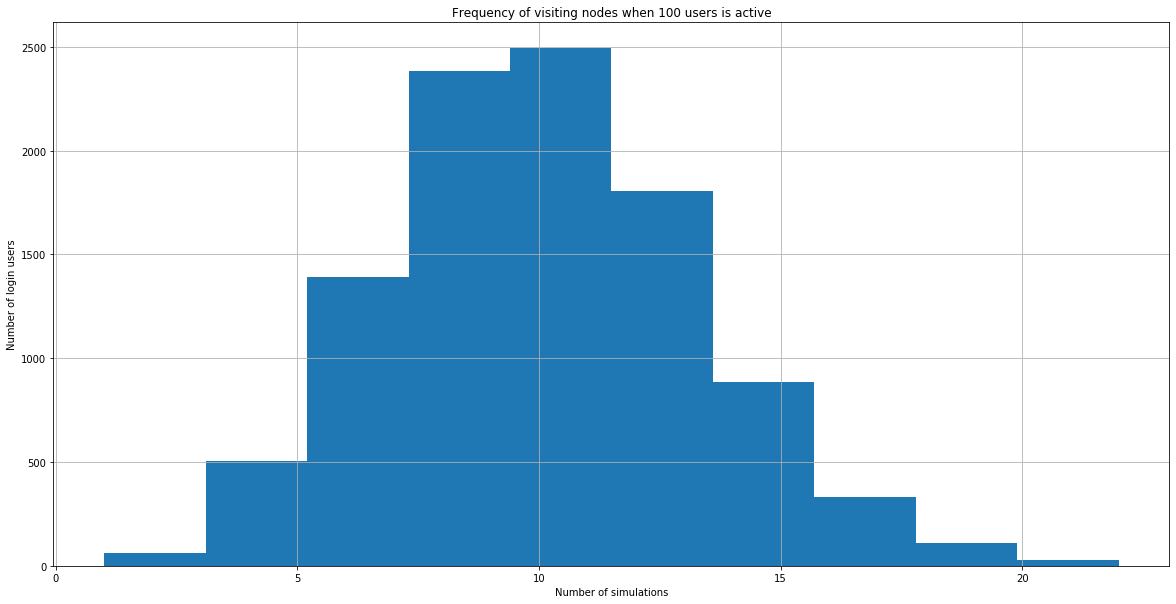

In [257]:
n_users = 100
users = [False] * n_users
prob_login = 0.2
N = 10000
y = []
active_users = 0
for n in range(N):
    y.append(simulate_markov_frequency2(users, prob_login, n_users, active_users))
plt.grid()
plt.title('Frequency of visiting nodes when 100 users is active')
plt.xlabel('Number of simulations')
plt.ylabel('Number of login users')
plt.rcParams["figure.figsize"]=(20, 10)
_=plt.hist(y)